### Principal Component Analysis 
Even after tons of data reduction, there are still too many variables for a meaningful analysis. We'll reduce to 2 or three dimensions.import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df_pivot = pd.read_csv('data_pivot.csv')

In [4]:
#scale and drop nulls
df_pivot = StandardScaler().fit_transform(df_pivot)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.fillna(0)

In [5]:
#Create (2D) PCA for the data
pca = PCA(n_components = 2, random_state = 7)
pca_mdl = pca.fit_transform(df_pivot)
pca_df = pd.DataFrame(pca_mdl)

In [6]:
pca_df.head()

,0,1
0,-0.623215,1.709444
1,-0.822609,1.717988
2,-0.073142,1.725776
3,-0.138593,1.697766
4,0.044331,1.745122


<AxesSubplot:xlabel='0', ylabel='1'>

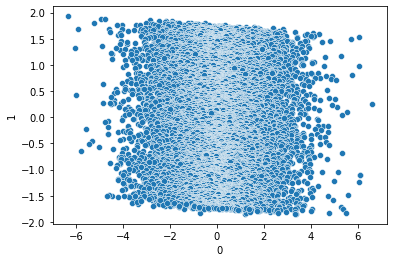

In [7]:
#2d plot
sns.scatterplot(x = pca_df[0], y = pca_df[1])

### Clustering Models
We'll start by using KMeans clustering algorithm on the 2D PCA

In [8]:
from sklearn.cluster import KMeans

In [9]:
#let's see how the number of clusters effects the score 
kmeans_list = [KMeans(n_clusters=n, max_iter=1000, algorithm='auto') for n in range(1,10)]
scores = [kmeans.fit(pca_df).score(pca_df) for kmeans in kmeans_list]

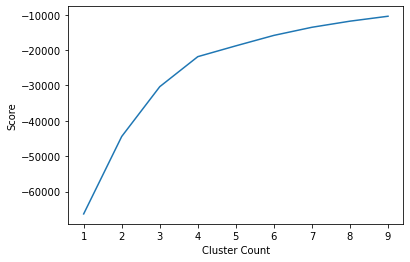

In [10]:
plt.plot(range(1,10), scores)
plt.xlabel('Cluster Count')
plt.ylabel('Score')
plt.show()

Looks like 4 clusters would be optimal

In [11]:
kmeans = KMeans(n_clusters=4, max_iter=1000, algorithm='auto')
fit_result = kmeans.fit(pca_df)
preds=kmeans.predict(pca_df)

<function matplotlib.pyplot.show(close=None, block=None)>

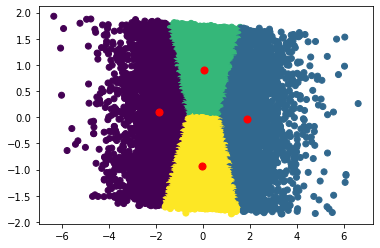

In [14]:
plt.scatter(pca_df[0], pca_df[1], c=preds)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red', s=50)
plt.show

Next, let's try the Agglomerative Clustering Model

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
ac = AgglomerativeClustering(n_clusters = 4)

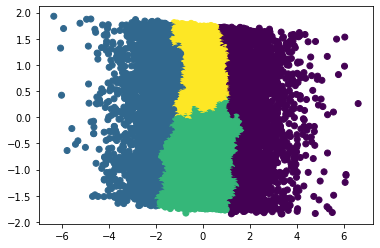

In [17]:
plt.scatter(pca_df[0], pca_df[1], c = ac.fit_predict(pca_df))
plt.show()

Interestingly, both KMeans and Agglomerative Clustering resulted in very similar clusters. 

Let's try again in 3D

In [18]:
pca3 = PCA(n_components = 3, random_state = 7)
pca_mdl = pca3.fit_transform(df_pivot)
pca_df = pd.DataFrame(pca_mdl)
pca_df.head()

,0,1,2
0,-0.623236,1.709423,0.863448
1,-0.822616,1.717934,-0.868779
2,-0.073139,1.725815,0.051364
3,-0.138597,1.697995,1.380127
4,0.044333,1.745160,-0.455817


In [19]:
kmeans_list = [KMeans(n_clusters=n, max_iter=1000, algorithm='auto') for n in range(1,10)]
scores = [kmeans.fit(pca_df).score(pca_df) for kmeans in kmeans_list]

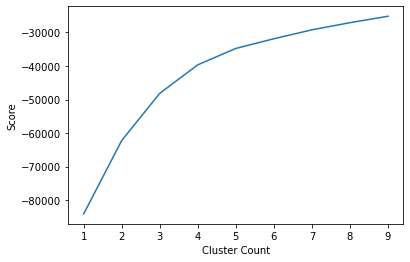

In [20]:
plt.plot(range(1,10), scores)
plt.xlabel('Cluster Count')
plt.ylabel('Score')
plt.show()

5 seems to be a solid value for K

In [21]:
kmeans = KMeans(n_clusters=5, max_iter=1000, algorithm='auto')
fit_result = kmeans.fit(pca_df)

preds=kmeans.predict(pca_df)

#### 3D KMeans Plot

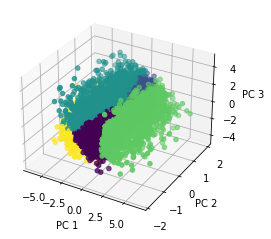

In [24]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

x = pca_df[0]
y = pca_df[1]
z = pca_df[2]

ax.set_xlabel("PC 1") # principle component #1
ax.set_ylabel("PC 2") # principle component #2
ax.set_zlabel("PC 3") # principle component #3

ax.scatter(x, y, z, c = preds)

plt.show()

#### 3D Agglomerative Clustering Plot

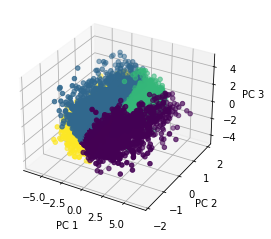

In [25]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

x = pca_df[0]
y = pca_df[1]
z = pca_df[2]

ax.set_xlabel("PC 1") # principle component #1
ax.set_ylabel("PC 2") # principle component #2
ax.set_zlabel("PC 3") # principle component #3

ax.scatter(x, y, z, c = ac.fit_predict(pca_df))

plt.show()

### Cluster Analysis
Coming in to this project, I imagined using clustering as a sort of recommendation system. I imagained using the clusters to implement collaborative filtering. However, it's hard to say how effective this would be in practice and I think it is beyond the scope of this project to try testing a recommendation system. Based on our "elbow" diagram, it  seemed that 4 clusters was optimal, and that seems to be a very small number if it were to be utilized in a recommendation system. I do think there are other applications that these clusters could be used for such as personalized advertisements (but of course Netflix does not run ads at the moment, but a company like Hulu which as a free subscription with ads could use a similar model). All and all, this is the biggest challenge of clustering. Interpreting the model and its clusters is no easy task.   